In [1]:
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials

In [2]:
# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/presentations',
         'https://www.googleapis.com/auth/spreadsheets']

creds = None
# The file token.json stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.json'):
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            '<PATH_TO_CREDS>', SCOPES)
        creds = flow.run_local_server()
    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(creds.to_json())

In [3]:
import gslides
from gslides import (
    Frame,
    Presentation,
    Spreadsheet,
    Table,
    Series, Chart
)
from sklearn import datasets
gslides.intialize_credentials(creds) #BringYourOwnCredentials

In [4]:
prs = Presentation.create(name = 'demo pres')

In [5]:
spr = Spreadsheet.create(
    title = 'demo spreadsheet',
    sheet_names = ['demo sheet']
)

In [6]:
#loading and pivoting data
iris = datasets.load_iris(as_frame = True)['data']
mapping = {}
target_names = [name.capitalize() for name in datasets.load_iris(as_frame = True)['target_names']]
for val, name in enumerate(target_names):
    mapping[val] = name
iris['target'] = datasets.load_iris(as_frame = True)['target'].map(mapping)
iris['key']=iris.groupby(['sepal length (cm)','target']).cumcount()
plt_df = iris.pivot(index=['sepal length (cm)','key'], columns='target', values='petal width (cm)').reset_index()

In [7]:
frame = Frame.create(df = plt_df,
          spreadsheet_id = spr.spreadsheet_id,
          sheet_id = spr.sheet_names['demo sheet'],
          sheet_name = 'demo sheet',
          overwrite_data = True
)

In [8]:
sc = Series.scatter(series_columns = target_names)
ch = Chart(
    data = frame.data,
    x_axis_column = 'sepal length (cm)',
    series = [sc],
    title = f'Demo Chart',
    x_axis_label = 'Sepal Length',
    y_axis_label = 'Petal Width',
    legend_position = 'RIGHT_LEGEND',
)

In [9]:
tbl = Table(
    data = iris[iris.columns[0:4]].head()
)

In [10]:
prs.add_slide(
  objects = [ch, tbl],
  layout = (1,2),
  title = "Investigation into Fischer's {{ replace }} dataset",
  notes = "Data from 1936"
)

In [11]:
prs.template(mapping = {'replace': 'Iris'})

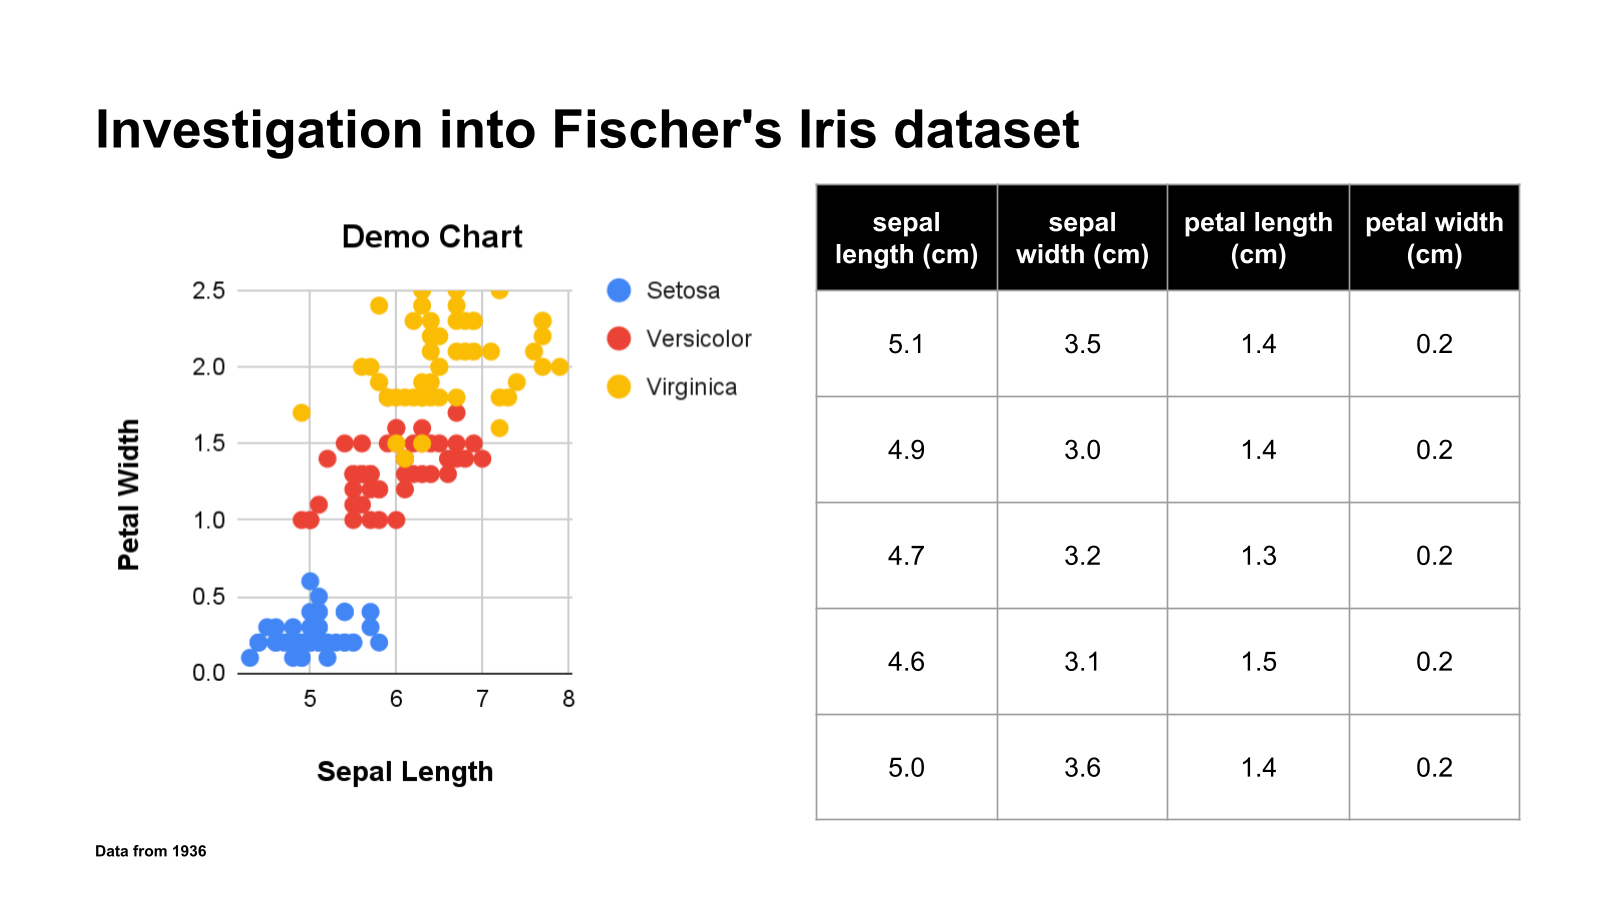

In [12]:
prs.show_slide(prs.slide_ids[-1])